In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler

In [3]:
train= pd.read_csv("/home/deepansh/tds/Genre Classification Dataset/train_data.txt", sep=":::", names= ["Title", "Genre", "Description"], engine= "python")

Shape of your Data Set loaded: (54214, 3)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  2
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    3 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
    All variable

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Title,object,0.000000,100,,,No issue
Genre,object,0.000000,0,,,12 rare categories: Too many to list. Group them into a single category or drop the categories.
Description,object,0.000000,99,,,No issue


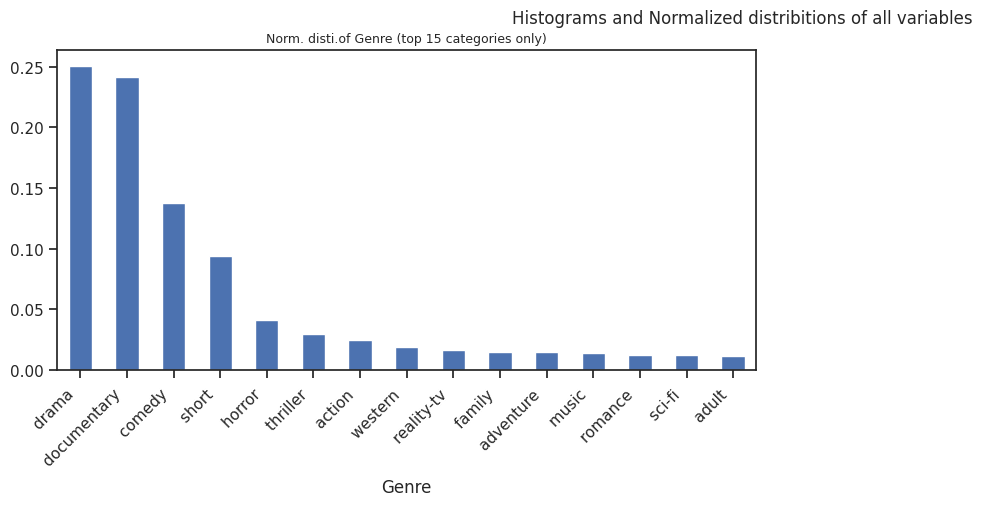

No categorical or boolean vars in data set. Hence no pivot plots...


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/deepansh/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /home/deepansh/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /home/deepansh/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /home/deepansh/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /home/deepansh/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /home/deepansh/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading 

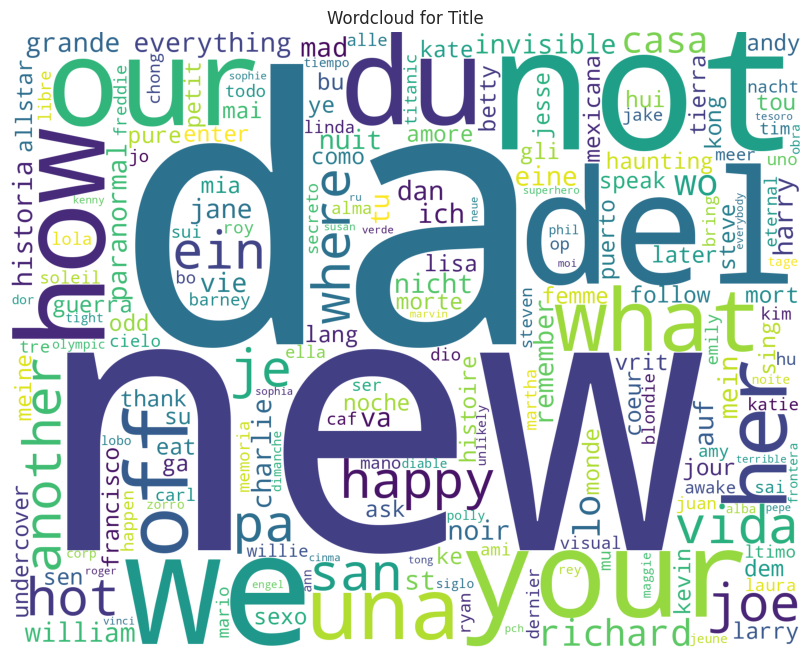

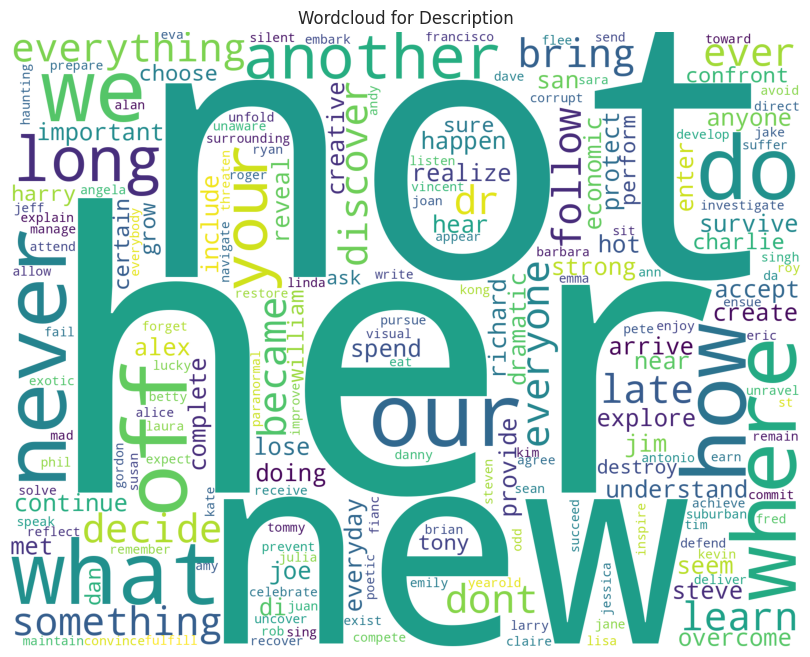

All Plots done
Time to run AutoViz = 122 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [7]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

from autoviz.AutoViz_Class import AutoViz_Class
av= AutoViz_Class()
import matplotlib.pyplot as plt
%matplotlib inline

filename= train
dft= av.AutoViz(
    filename

)



In [9]:
train.head()
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [10]:
train.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [11]:
train.describe()

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Nature's Fury: Storm of the Century (2006),drama,"Grammy - music award of the American academy of the audio recording, was founded by the American association of sound-recording companies of March, 14, 1958. Grammy is awarded annually as a result of voting by the authorized members of ""Recording Academy""."
freq,1,13613,12
